In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
data= pd.read_csv('data/multi.csv')

In [3]:
data.head()

,feature1,feature2,feature3,feature4,y
0,6.697568,5.358884,6.079641,6.005001,3.750561
1,18.937950,21.079310,21.378936,21.347908,7.212618
2,0.461901,0.758917,2.486963,2.308012,1.442524
3,5.080914,3.221526,5.206520,5.000960,1.442524
4,6.235667,7.867957,4.855840,5.167766,2.019533


In [4]:
X= data[['feature1', 'feature2', 'feature3', 'feature4']].values
y= data['y'].values
y= y.reshape(1,-2)
X.shape, y.shape

((241978, 4), (1, 241978))

# Using NumPy

In [5]:
'''
y= b + w1*x1 + w2*x2 + w3*x3 + w4*x4
or
y= w*X.T
'''

w= np.random.rand(1,5)
X= np.concatenate([np.ones((X.shape[0],1)), X], axis= 1)
X.shape

(241978, 5)

In [6]:
alpha= 0.001
num_iterations= 100
m= X.shape[0]

cost= []
for i in range(num_iterations):
    y_pred= np.dot(w, X.T)
    error= np.mean((y-y_pred)**2)
    grad= (-2/m)*np.dot(y-y_pred, X)
    w= w- alpha*grad
    cost.append(error)

In [7]:
y_pred= np.dot(w, X.T)
y_pred

array([[ 4.24933515, 14.33221029,  1.35661956, ...,  0.8623907 ,
         0.91431853,  0.67325168]])

In [8]:
error= np.mean((y-y_pred)**2)
error

3.8349721102836978

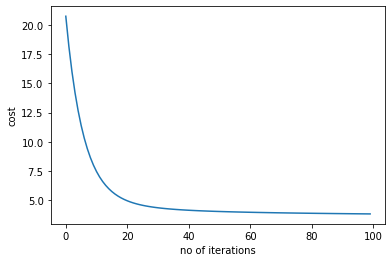

In [9]:
plt.figure()
plt.plot(np.arange(len(cost)), cost)
plt.xlabel('no of iterations')
plt.ylabel('cost')
plt.show()

Now we can do the above regression task in a single line of code using sklearn library in python. We will learn more about sklearn library in our further sessions.
# Using sklearn

In [10]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X, y.T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.predict(X)

array([[ 4.31164644],
       [15.13075331],
       [ 1.11485956],
       ...,
       [ 0.91794771],
       [ 0.95897869],
       [ 0.67178202]])

In [12]:
lr.coef_

array([[ 0.        ,  0.007301  ,  0.69189178, -0.04290094,  0.03319191]])

In [13]:
lr.intercept_

array([0.61648442])